# Cell 1 — Imports & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))


from src.preprocessing import (
    filter_products,
    remove_empty_narratives,
    clean_narratives
)

sns.set_style("whitegrid")


# Cell 2 — Load Dataset

In [2]:
DATA_PATH = "../data/raw/complaints.csv"  

df = pd.read_csv(DATA_PATH)


C:\Users\bethy\AppData\Local\Temp\ipykernel_14524\2303514073.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


# Cell 3 — Initial Inspection

In [3]:
df.head()



,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [4]:
df.shape


(9609797, 18)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

# Cell 4 — Missing Values Overview

In [6]:
df.isnull().sum().sort_values(ascending=False)


Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date received                         0
Product                               0
Company                               0
Date sent to company                  0
Submitted via                         0
Timely response?                      0
Complaint ID                          0
dtype: int64

# Cell 5 — Product Distribution (Before Filtering)

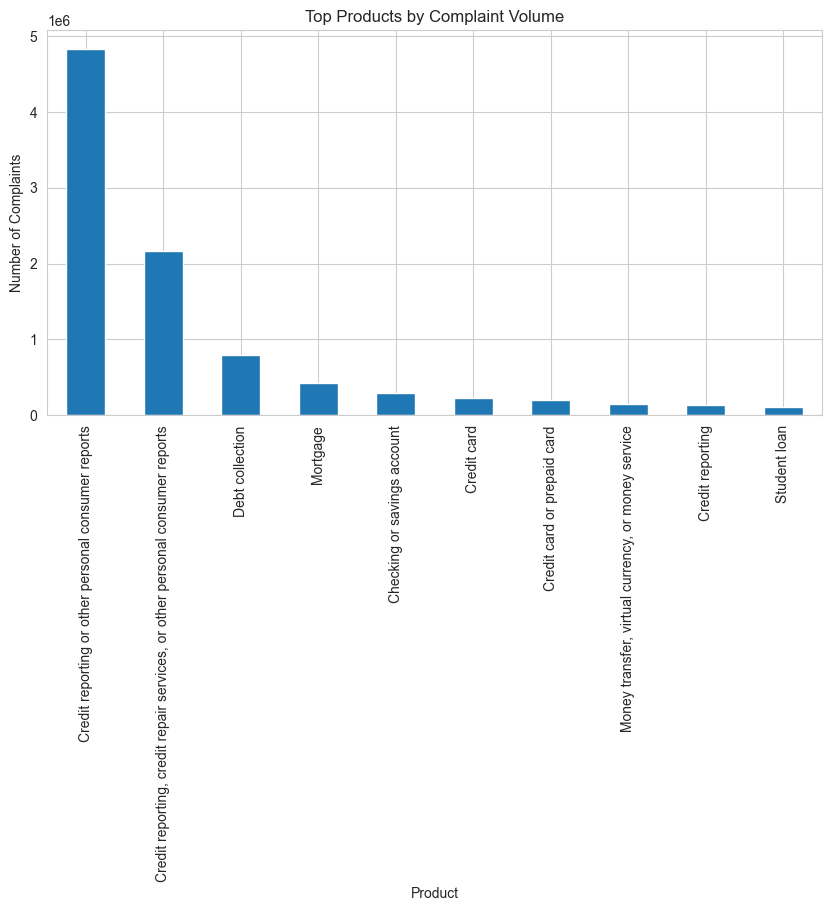

In [7]:
plt.figure(figsize=(10, 5))
df["Product"].value_counts().head(10).plot(kind="bar")
plt.title("Top Products by Complaint Volume")
plt.ylabel("Number of Complaints")
plt.show()


# Cell 6 — Narrative Presence Analysis

In [10]:
total_complaints = len(df)
with_narrative = df["Consumer complaint narrative"].notna().sum()

print(f"Total complaints: {total_complaints}")
print(f"Complaints with narratives: {with_narrative}")
print(f"Percentage usable: {with_narrative / total_complaints:.2%}")


Total complaints: 9609797
Complaints with narratives: 2980756
Percentage usable: 31.02%


# Cell 7 — Narrative Length (Word Count)

In [11]:
df["word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)


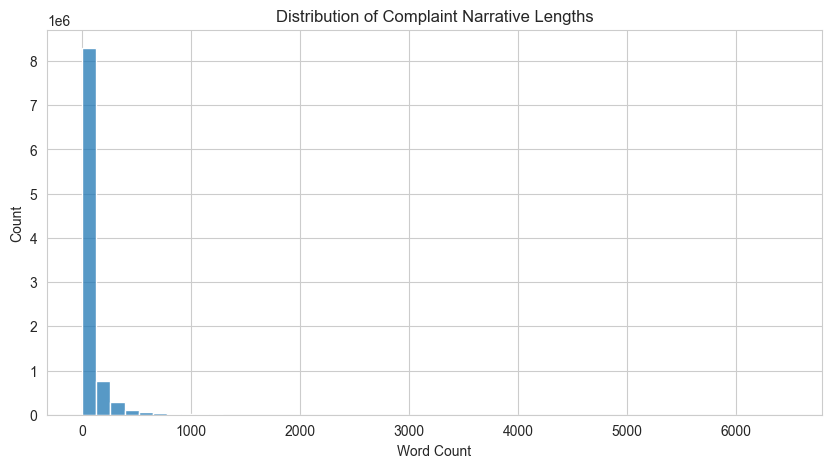

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df["word_count"], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.show()


# Cell 8 — Apply Product Filtering

In [13]:
df_filtered = filter_products(df)

print(f"After product filtering: {df_filtered.shape[0]} complaints")


After product filtering: 232040 complaints


# Cell 9 — Remove Empty Narratives

In [14]:
df_filtered = remove_empty_narratives(df_filtered)

print(f"After removing empty narratives: {df_filtered.shape[0]} complaints")


After removing empty narratives: 82164 complaints


# Cell 10 — Clean Text Narratives

In [15]:
df_filtered = clean_narratives(df_filtered)


In [16]:
df_filtered["cleaned_narrative"].str.startswith("b").sum()


np.int64(1244)

In [17]:
df_filtered["cleaned_narrative"].isna().sum()


np.int64(0)

In [18]:
df_filtered[["Consumer complaint narrative", "cleaned_narrative"]].head()


,Consumer complaint narrative,cleaned_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards the credit balance...
13955,b'I am writing to dispute the following charge...,i am writing to dispute the following charges ...
14249,"Although the account had been deemed closed, I...",although the account had been deemed closed i ...


# Cell 11 — Final Dataset Columns

In [19]:
final_columns = [
    "Complaint ID",
    "Product",
    "Issue",
    "Sub-issue",
    "cleaned_narrative",
    "Date received",
    "Company",
    "State",
]

df_final = df_filtered[final_columns]
df_final.head()


,Complaint ID,Product,Issue,Sub-issue,cleaned_narrative,Date received,Company,State
12237,14069121,Credit card,Getting a credit card,Card opened without my consent or knowledge,a xxxx xxxx card was opened under my name by a...,2025-06-13,"CITIBANK, N.A.",TX
13280,14047085,Credit card,"Other features, terms, or problems",Other problem,dear cfpb i have a secured credit card with ci...,2025-06-12,"CITIBANK, N.A.",NY
13506,14040217,Credit card,Incorrect information on your report,Account information incorrect,i have a citi rewards cards the credit balance...,2025-06-12,"CITIBANK, N.A.",IL
13955,13968411,Credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,i am writing to dispute the following charges ...,2025-06-09,"CITIBANK, N.A.",TX
14249,13965746,Credit card,Problem when making payments,Problem during payment process,although the account had been deemed closed i ...,2025-06-09,Atlanticus Services Corporation,NY


# Cell 12 — Save Cleaned Dataset

In [20]:
OUTPUT_PATH = "../data/processed/filtered_complaints.csv"

df_final.to_csv(OUTPUT_PATH, index=False)

print(f"Saved cleaned dataset to {OUTPUT_PATH}")


Saved cleaned dataset to ../data/processed/filtered_complaints.csv
